Notebook prepared by Cayetano Benavent, 2016.

## Computing k-nearest Neighbors


Based (and adapted to Python 3) on this paper of Christian Bauckhage:


https://www.researchgate.net/publication/283568278_NumPy_SciPy_Recipes_for_Data_Science_Computing_Nearest_Neighbors?channel=doi&linkId=563f695508ae45b5d28d2ea9&showFulltext=true

In [46]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def nearest_neighbor_method1(X, q):
    """
    Method 1: naive linear nearest neighbor search
    """
    m, n = X.shape
    minindx = 0
    mindist = np.inf

    for i in range(n):
        dist = la.norm(X[:,i] - q)
        if dist <= mindist:
            mindist = dist
            minindx = i

    return minindx


In [23]:
def nearest_neighbor_method2(X, q):
    """
    Method 2: efﬁcient linear nearest neighbor search
    """
    m, n = X.shape
    return np.argmin(np.sum((X-q.reshape(m,1))**2, axis=0))

In [24]:
def nearest_neighbor_method3(X, q):
    """
    Method 3: efﬁcient linear nearest neighbor search
    """
    X = X.T
    return np.argmin(np.sum((X - q)**2, axis=1))

In [25]:
def k_nearest_neighbors_method1(X, q, k):
    """
    Method 1: k-nearest neighbor search
    """
    X = X.T
    sorted_inds = np.argsort(np.sum((X - q)**2, axis=1))
    return sorted_inds[:k]

In [26]:
def k_nearest_neighbors_method2(X, q, k):
    """
    Method 2: k-nearest neighbor search
    by Luis F. Simoes
    """
    X = X.T
    partition_inds = np.sum((X - q)**2, axis=1).argpartition(k)
    return partition_inds[:k]

In [27]:
X = np.random.randn(2, 250)
q = np.array([0.5, 0.5])

In [28]:
print(X)

[[ -2.17718645e+00  -3.48372671e-01  -5.21210834e-01   5.41680861e-01
    9.48706824e-01  -1.67536299e-01  -1.47879123e-01  -6.07281793e-01
   -2.46032243e-01  -8.88140990e-01   2.01179180e-01   5.53878003e-01
    1.53257729e-01  -9.93151354e-01  -7.23565105e-02   2.06969951e-01
   -1.59655546e+00   5.03604117e-01  -2.09481397e-01   3.41881224e-01
    2.84225757e-01  -7.65580467e-01   2.30833379e-01  -8.81490290e-01
    3.85165987e-01   2.67070531e-01   4.70314907e-01   7.54557153e-01
   -9.85983743e-01  -1.35044186e-01  -7.71407710e-01  -1.19484473e+00
   -7.09853573e-01  -1.43220404e+00   1.00197292e+00   1.77938838e+00
    1.52220790e+00  -5.77866615e-01   1.28512188e+00   6.40946225e-01
    2.63295616e-01   7.67567961e-01  -1.68461266e+00  -1.51373895e+00
    8.52167354e-01  -6.39755729e-01   2.32037917e-01   1.13025475e+00
   -7.84262865e-01   1.39379166e+00   7.74703878e-01   1.45015910e+00
    5.33248670e-01   3.21995857e-01   2.15300258e-01   3.13842348e-01
   -7.41609779e-01  

In [29]:
print(q)

[ 0.5  0.5]


In [40]:
%timeit nn_mt01 = nearest_neighbor_method1(X, q)
print(nn_mt01)

100 loops, best of 3: 2.3 ms per loop
26


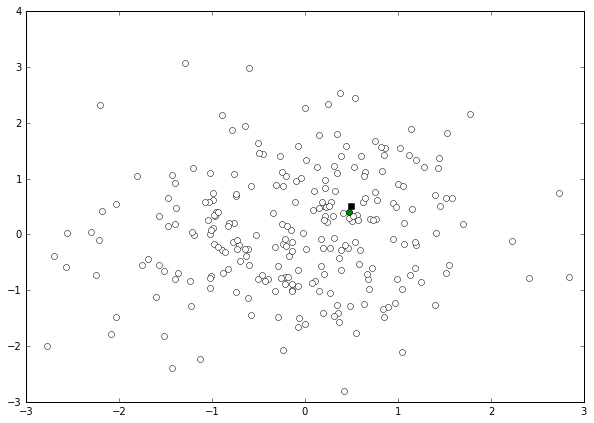

In [72]:
plt.figure(figsize=(10,7))

plt.plot(q[0], q[1], 'ks')
plt.plot(X[0,:], X[1,:], 'wo')
plt.plot(X[0,nn_mt01], X[1,nn_mt01], 'go')

plt.show()

In [41]:
%timeit nn_mt02 = nearest_neighbor_method2(X, q)
print(nn_mt02)

The slowest run took 6.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 15.5 µs per loop
26


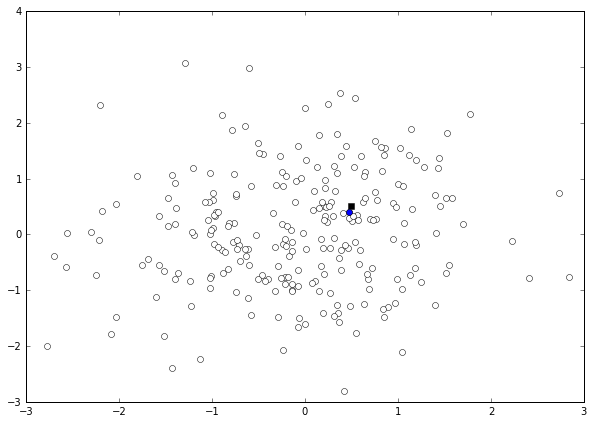

In [70]:
plt.figure(figsize=(10,7))

plt.plot(q[0], q[1], 'ks')
plt.plot(X[0,:], X[1,:], 'wo')
plt.plot(X[0,nn_mt02], X[1,nn_mt02], 'bo')

plt.show()

In [42]:
%timeit nn_mt03 = nearest_neighbor_method3(X, q)
print(nn_mt03)

The slowest run took 8.04 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14 µs per loop
26


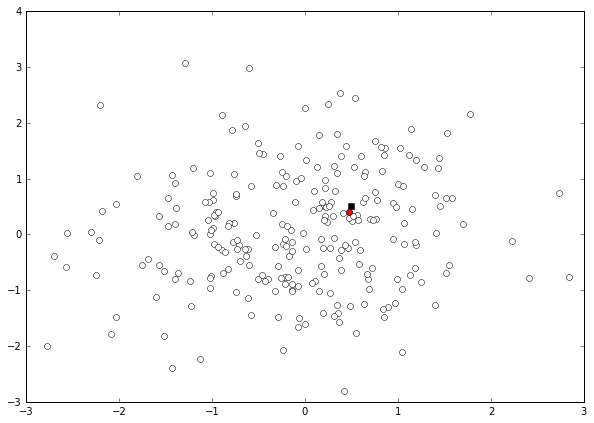

In [71]:
plt.figure(figsize=(10,7))

plt.plot(q[0], q[1], 'ks')
plt.plot(X[0,:], X[1,:], 'wo')
plt.plot(X[0,nn_mt03], X[1,nn_mt03], 'ro')

plt.show()

In [43]:
%timeit knn_mt01 = k_nearest_neighbors_method1(X, q, 25)
print(knn_mt01)

The slowest run took 10.22 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.5 µs per loop
[ 26  90  81  82 106  85 134  20  40 104 119  17  22  50  94  10  96  54
  53 161  41 206  27  46  91]


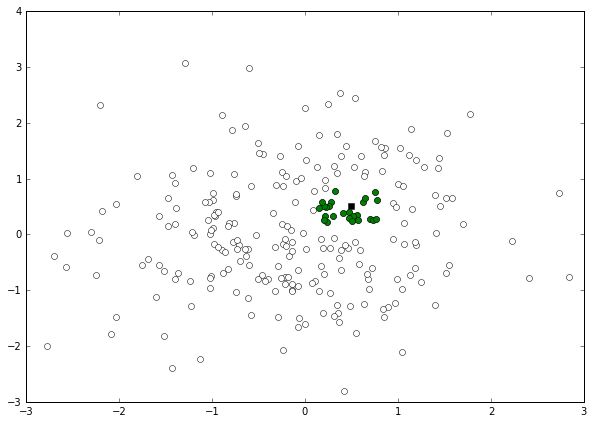

In [66]:
plt.figure(figsize=(10,7))

plt.plot(q[0], q[1], 'ks')
plt.plot(X[0,:], X[1,:], 'wo')
plt.plot(X[0,knn_mt01], X[1,knn_mt01], 'go')

plt.show()

In [44]:
%timeit knn_mt02 = k_nearest_neighbors_method2(X, q, 25)
print(knn_mt02)

The slowest run took 6.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 16.9 µs per loop
[ 90  20 134  26  82  85  81 106  40  22  54 119  50  53  94  96  10  17
 104 161  41 206  27  46  91]


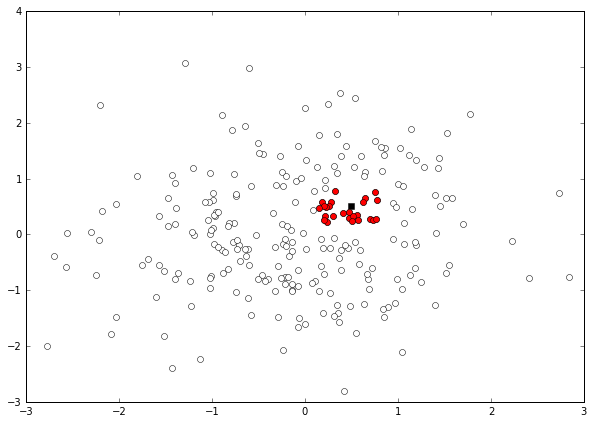

In [67]:
plt.figure(figsize=(10,7))

plt.plot(q[0], q[1], 'ks')
plt.plot(X[0,:], X[1,:], 'wo')
plt.plot(X[0,knn_mt02], X[1,knn_mt02], 'ro')

plt.show()